## Ejercicio 3.17
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_3.17.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

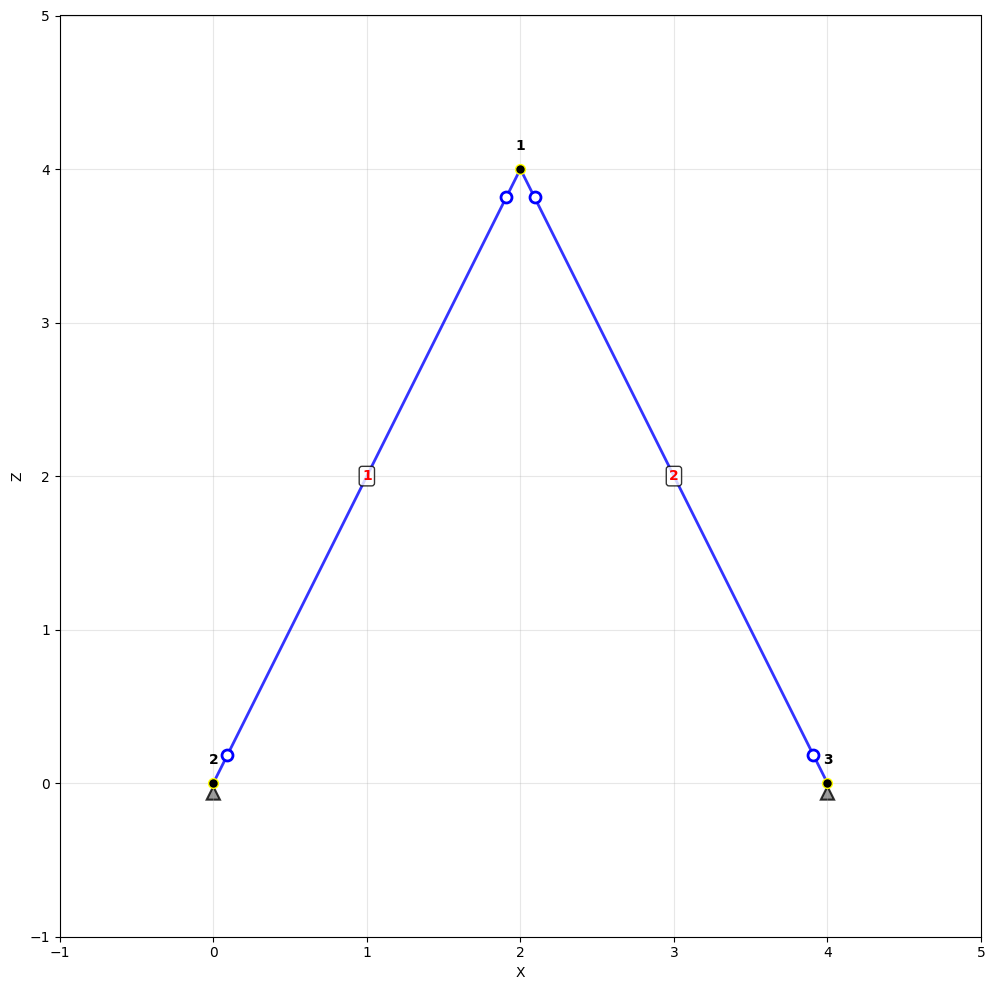

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 70 * 10 ** 6
A = 4000 *10**-6
I = 1

# Definición de Nodos (Geometría)
system.defineNode(1, x=2, z=4)
system.defineNode(2, x=0, z=0)
system.defineNode(3, x=4, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(2, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 2, 1, A=A, E=E, I=I)
system.defineElement(2, 3, 1, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(1, fx=30, fz=-50, my=0)

# Configuración de Liberaciones en Elementos
system.assignElement.releases(1, start=True, end=True)
system.assignElement.releases(2, start=True, end=True)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 7 de 9
GL restringidos: [2 3 4 5 6 7 8]
Grados de libertad libres (fuerzas conocidas): 2 de 9
GL libres: [0 1]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (2x2):
  |         0 |          1 |

  |      25044 |          0 |
  |          0 |     100176 |
 
KAB (2x7):
  |         2 |          3 |          4 |          5 |          6 |          7 |          8 |
 
  |          0 |     -12522 |     -25044 |          0 |     -12522 |      25044 |          0 |
  |          0 |     -25044 |     -50088 |          0 |      25044 |     -

In [4]:
# Obtención de Resultados de nodos y elementos
system.getResults()

RESULTADOS DE NODOS

Node 1: (2, 4) - Libre
  Desplazamientos: Ux=1.1979e-03, Uz=-4.9912e-04, Ry=0.0000e+00
  Fuerzas: Fx=30.000, Fz=-50.000, My=0.000

Node 2: (0, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-1.1161e-04
  Fuerzas: Fx=-2.500, Fz=-5.000, My=0.000

Node 3: (4, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-1.1161e-04
  Fuerzas: Fx=-27.500, Fz=55.000, My=0.000

RESULTADOS DE ELEMENTOS

--------------------------------------------------------------------------------
ELEMENTO 1: [2, 1]  - Tipo 3
--------------------------------------------------------------------------------
FUERZAS DE EMPOTRAMIENTO PERFECTO FEF:
  |       Fxi |        Fzi |        Myi |        Fxj |        Fzj |        Myj |
  |     0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |

FUERZAS INTERNAS:
  |       Fxi |        Fzi |        Myi |        Fxj |        Fzj |        Myj |
  |    -5.590 |      0.000 |      0.000 |      5.590 |      0.000 |     

In [5]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [2, 1]  - Tipo 3
PROPIEDADES
  Longitud: 4.472
  Área (A): 4.0000e-03
  Módulo elástico (E): 7.0000e+07
  Momento de inercia (I): 1.0000e+00
  Liberaciones:  Nodo i = SÍ | Nodo j = SÍ
  Orientación: C=0.447 | S=0.894

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      0.447 |      0.894 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.894 |      0.447 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.447 |      0.894 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.894 |      0.447 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  |  62609.903 |      0.000 |      0.000 | -62609.903 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
 

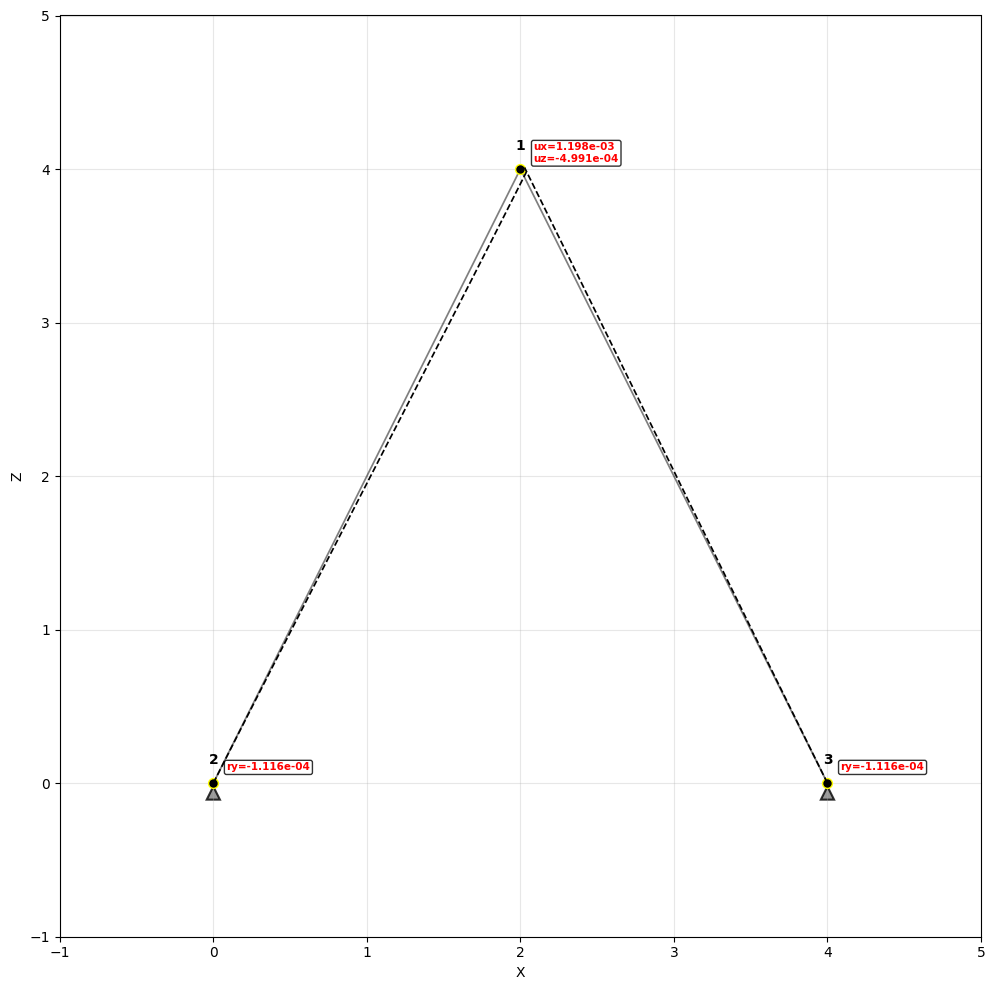

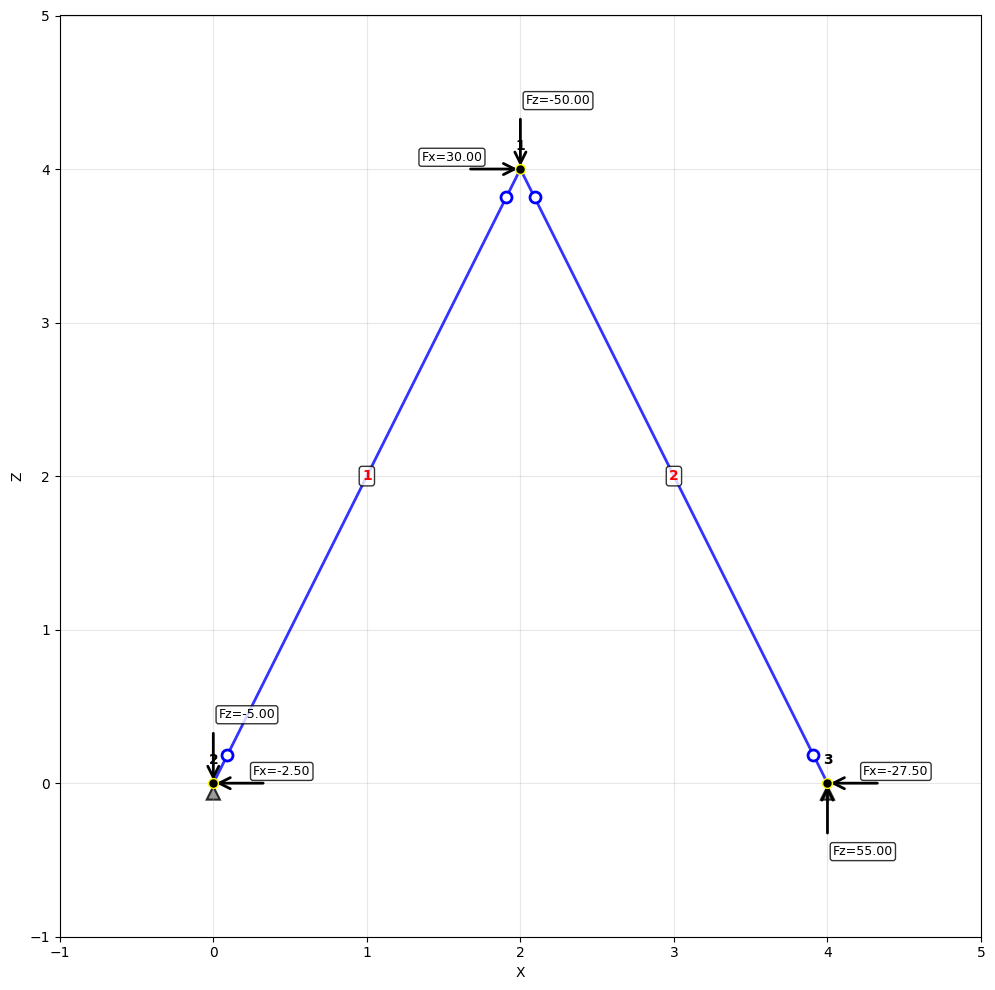

In [10]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.01)
plotter.showReactions()